In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [46]:
import tensorflow as tf
print (tf.__version__) # dernière version est 2.4.1
#from tensorflow.python.ops.gen_data_flow_ops import tensor_array

2.4.1


In [47]:
sonar = pd.read_csv("sonar.all-data.csv", header = None)

### Un peu d'EDA

In [48]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [49]:
X=sonar.iloc[:,0:60]
nb_features = len(X.columns)
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [50]:
#Combien de valeurs unique dans le target ?
sonar[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [51]:
#Codage du target en valeur numériques (à la place de LabelEncoder)
sonar[60].replace({'M':1,'R':0},inplace=True)

In [52]:
# Définition du target en numpy et vérification des valeurs uniques
y = sonar[60].values
np.unique(y)

array([0, 1])

### Constructions des jeux de données entrainement et test

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [55]:
#Standardisation des valeurs de X_train et Y_test sur une même échelle de valeurs centrée autour de 0
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Construction du Modèle de Deep Learning
Méthode API

### Questions pour le prof
fonction d'activitation dans le CNN ?
* Relu en entrée 
* Relu dans les couches cachées
* Sigmoid en sortie si classification binaire
* Softmax en sortie si classification multiple

Batch size = 1 ici car le jeu de données est petit ?

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [57]:
#Construction de 3 couches (entrée,dense,sortie)
#La couche d'entrée avec le nombre de neurones = au nombre de features de notre dataset
entree = Input(shape=(nb_features,))
#La couche dense comporte 24 neurones et une fonction d'activation "relu"
cachee = Dense (24, activation='relu')(entree)

#La couche de sortie comporte 1 seul neurone car le target est binaire
sortie = Dense (1,activation='sigmoid')(cachee)
model = Model (inputs=entree,outputs=sortie)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


## Compile

In [58]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Séparation du jeux d'entrainement en 1 jeu de validation et 1 d'entraintement

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

In [60]:
X_val.shape

(34, 60)

In [61]:
X_train.shape

(132, 60)

## Fit 

In [62]:
history = model.fit(X_train,y_train,epochs=300,batch_size=1,verbose=0,validation_data=(X_val,y_val))

In [63]:
history_df=pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,7.862325e-01,0.515152,0.557438,0.647059
1,4.976476e-01,0.765152,0.454426,0.794118
2,3.974205e-01,0.818182,0.411222,0.823529
3,3.349451e-01,0.878788,0.388870,0.852941
4,2.945665e-01,0.909091,0.374366,0.823529
...,...,...,...,...
295,4.805920e-09,1.000000,0.857736,0.823529
296,4.827550e-09,1.000000,0.859307,0.823529
297,4.734352e-09,1.000000,0.862170,0.852941
298,4.546313e-09,1.000000,0.863281,0.823529


In [64]:
import matplotlib.pyplot as plt
def plot_learning_curves(history = history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

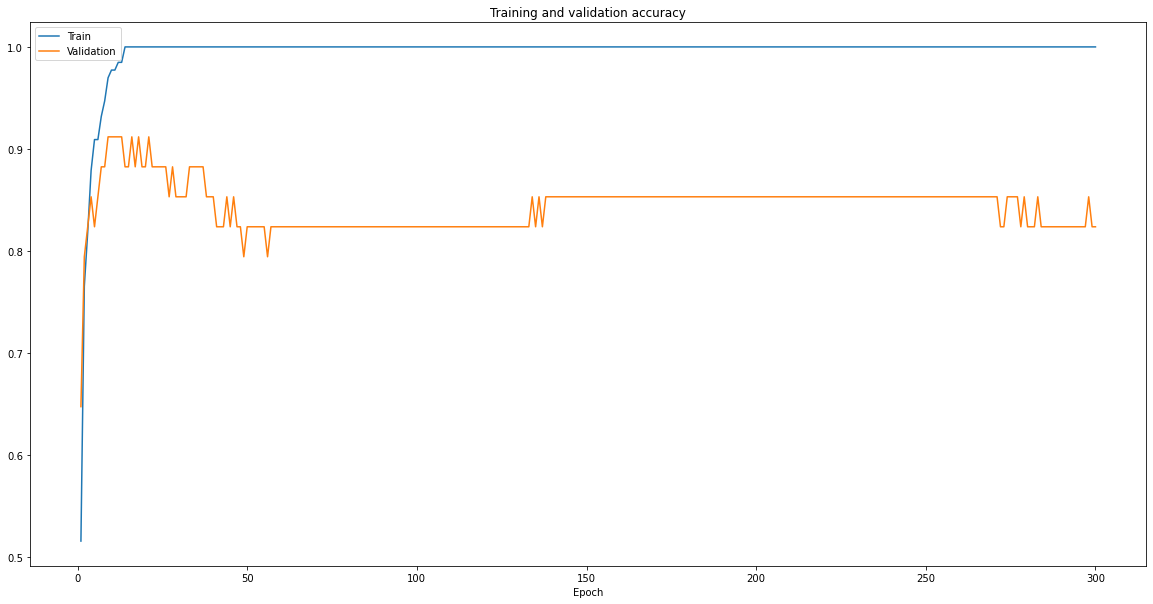

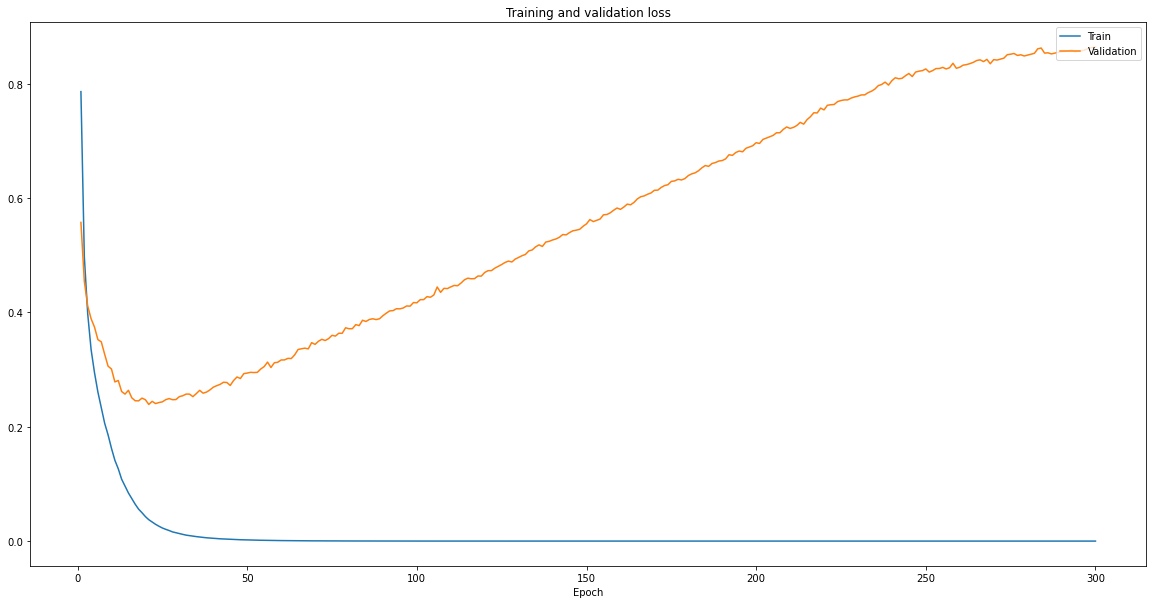

In [65]:
plot_learning_curves(history)

In [66]:
score=model.evaluate(X_test,y_test,batch_size=1)

42/42 [==============================] - 0s 623us/step - loss: 0.2142 - accuracy: 0.9524


## Predict Values

In [67]:
y_proba = model.predict(X_test,batch_size=1)

In [68]:
# méthode pour avoir les prédiction de y si classification binaire
y_pred = (model.predict(X_test) > 0.5).astype('int32')

In [69]:
pd.DataFrame({'y_proba':y_proba.flatten(),'y_pred':y_pred.flatten(),'y_test':y_test}).head(10)

,y_proba,y_pred,y_test
0,9.168639e-01,1,1
1,9.999894e-01,1,1
2,1.000000e+00,1,1
3,1.000000e+00,1,1
4,2.165240e-19,0,0
5,9.942844e-01,1,0
6,1.977430e-09,0,0
7,1.000000e+00,1,1
8,3.503934e-13,0,0
9,7.149054e-15,0,0


## Evaluate Model

In [70]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [71]:
confusion_matrix(y_test, y_pred)
# TN,FN
# FP,TP

array([[18,  2],
       [ 0, 22]])

In [72]:
precision_score(y_test, y_pred)

0.9166666666666666

## Construction du Modèle
Méthode sequentielle

In [97]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model_sequential = Sequential()

In [98]:
# Add an input layer 
model_sequential.add(Dense(nb_features+1, activation='relu', input_shape=(nb_features,)))

# Add one hidden layer 
model_sequential.add(Dense(24, activation='relu'))

# Add an output layer 
model_sequential.add(Dense(1, activation='sigmoid'))

In [99]:
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 61)                3721      
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1488      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 5,234
Trainable params: 5,234
Non-trainable params: 0
_________________________________________________________________


## Compile

In [100]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_sequential.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fit

In [101]:
history_seq = model.fit(X_train,y_train,epochs=300,batch_size=2,verbose=0,validation_data=(X_val,y_val))

In [102]:
history_seq_df=pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,4.792503e-09,1.0,0.958364,0.764706
1,4.799858e-09,1.0,0.958496,0.764706
2,4.808197e-09,1.0,0.958616,0.764706
3,4.815977e-09,1.0,0.958749,0.764706
4,4.823721e-09,1.0,0.958873,0.764706
...,...,...,...,...
295,4.922875e-09,1.0,0.973371,0.764706
296,4.928446e-09,1.0,0.973466,0.764706
297,4.935369e-09,1.0,0.973575,0.764706
298,4.941051e-09,1.0,0.973677,0.764706


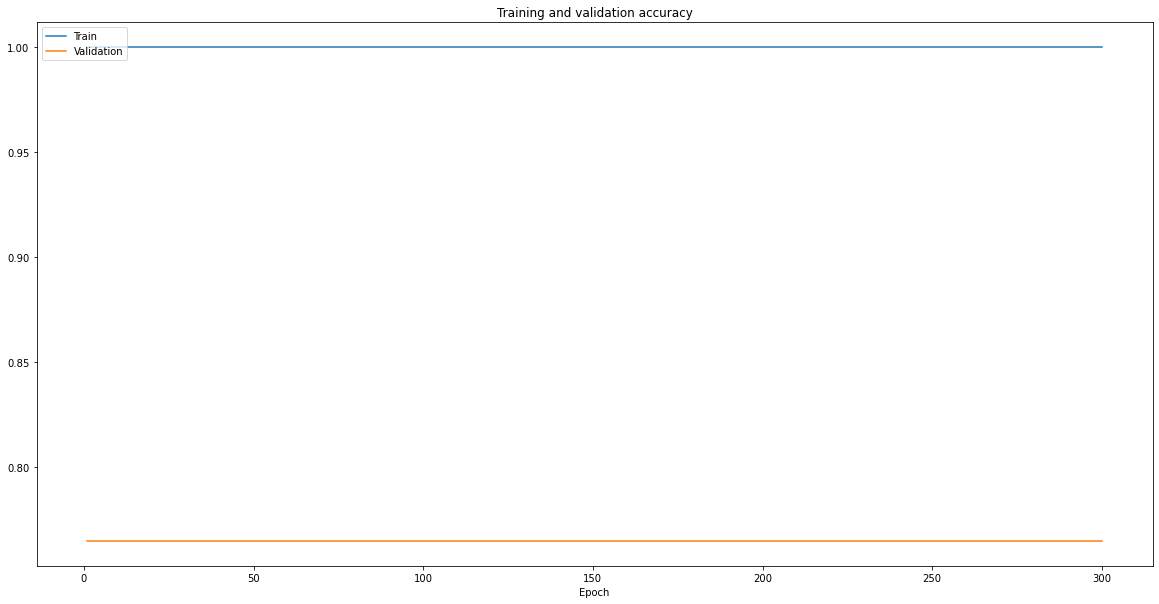

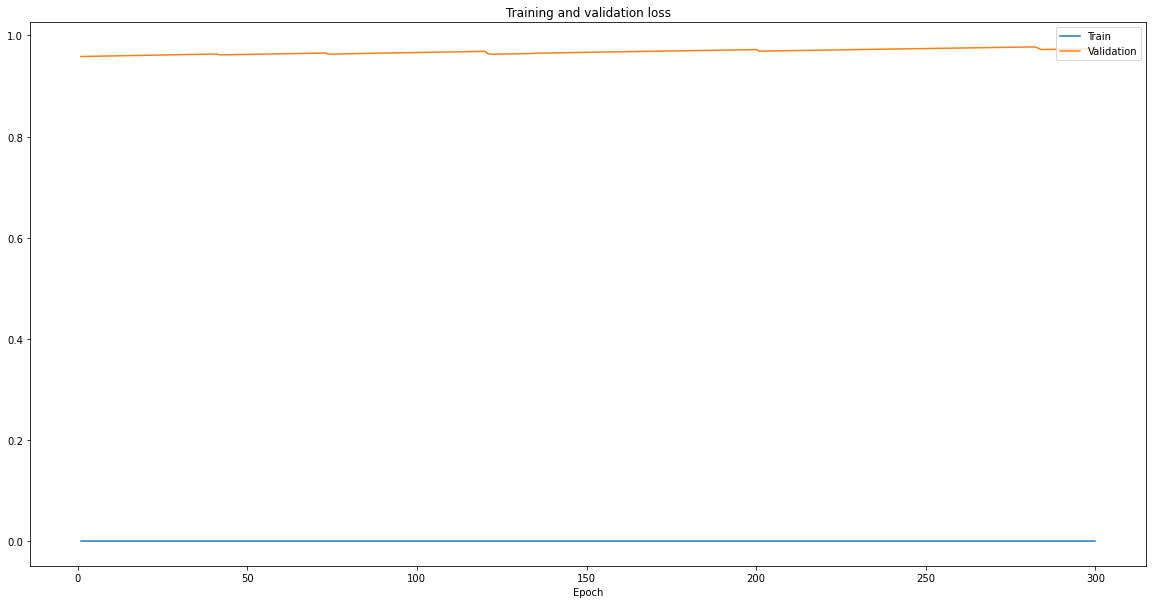

In [103]:
plot_learning_curves(history_seq)

In [104]:
score=model_sequential.evaluate(X_test,y_test,batch_size=1)

42/42 [==============================] - 0s 590us/step - loss: 0.7230 - accuracy: 0.3966


## Predict Values

In [105]:
y_proba = model_sequential.predict(X_test,batch_size=1)

In [106]:
# méthode pour avoir les prédiction de y si classification binaire
y_pred = (model_sequential.predict(X_test) > 0.5).astype('int32')

In [107]:
pd.DataFrame({'y_proba':y_proba.flatten(),'y_pred':y_pred.flatten(),'y_test':y_test})

,y_proba,y_pred,y_test
0,0.455750,0,1
1,0.366408,0,1
2,0.481370,0,1
3,0.465914,0,1
4,0.431345,0,0
5,0.277436,0,0
6,0.402939,0,0
7,0.610988,1,1
8,0.611565,1,0
9,0.550342,1,0


## Evaluate Model

In [108]:
confusion_matrix(y_test, y_pred)
# TN,FN
# FP,TP

array([[12,  8],
       [14,  8]])

In [109]:
precision_score(y_test, y_pred)

0.5